In [1]:
# import libraries
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
### load the train and test dataset
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

In [5]:
# load the train and test dataset
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

In [7]:
# make a copy of original data
# so that even if we have to make any changes in these datasets we would not lose the original datasets

train_original = train.copy()
test_original = test.copy()

In [9]:
# take a look at the top 5 rows of the train set, notice the column "Loan_Status"
train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [11]:
# take a look at the top 5 rows of the test set, notice the absense of "Loan_Status" that we will predict
test.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


In [13]:
# show the shape of the dataset i.e. no of rows, no of columns
train.shape, test.shape

((614, 13), (367, 12))

In [15]:
# calculate train-test-split ratio
train.shape[0]/(train.shape[0]+test.shape[0]), test.shape[0]/(train.shape[0]+test.shape[0])

(0.6258919469928644, 0.37410805300713557)

In [17]:
# take a look at the features (i.e. independent variables) in the dataset
train.columns, test.columns

(Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
        'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
        'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
       dtype='object'),
 Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
        'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
        'Loan_Amount_Term', 'Credit_History', 'Property_Area'],
       dtype='object'))

In [19]:
# show the data types for each column of the train set
train.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [21]:
# concise summary of the dataset, info about index dtype, column dtypes, non-null values and memory usage
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [23]:
# frequency table of a variable will give us the count of each category in that variable
train['Loan_Status'].value_counts()

Loan_Status
Y    422
N    192
Name: count, dtype: int64

In [25]:
# percentage distribution can be calculated by setting the normalize=True to show proportions instead of number 
train['Loan_Status'].value_counts(normalize=True)

Loan_Status
Y    0.687296
N    0.312704
Name: proportion, dtype: float64

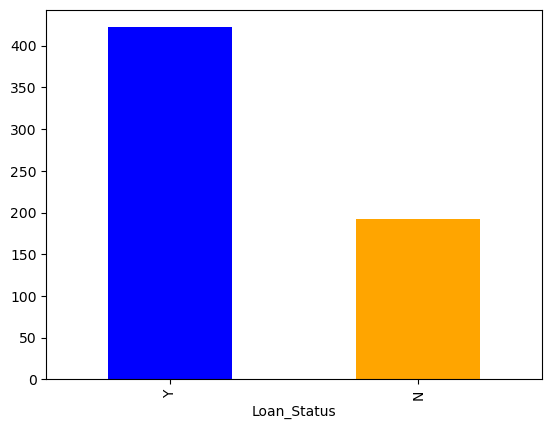

In [27]:
# bar plot to visualize the frequency
train['Loan_Status'].value_counts().plot.bar(color=['blue', 'orange'])
plt.show()

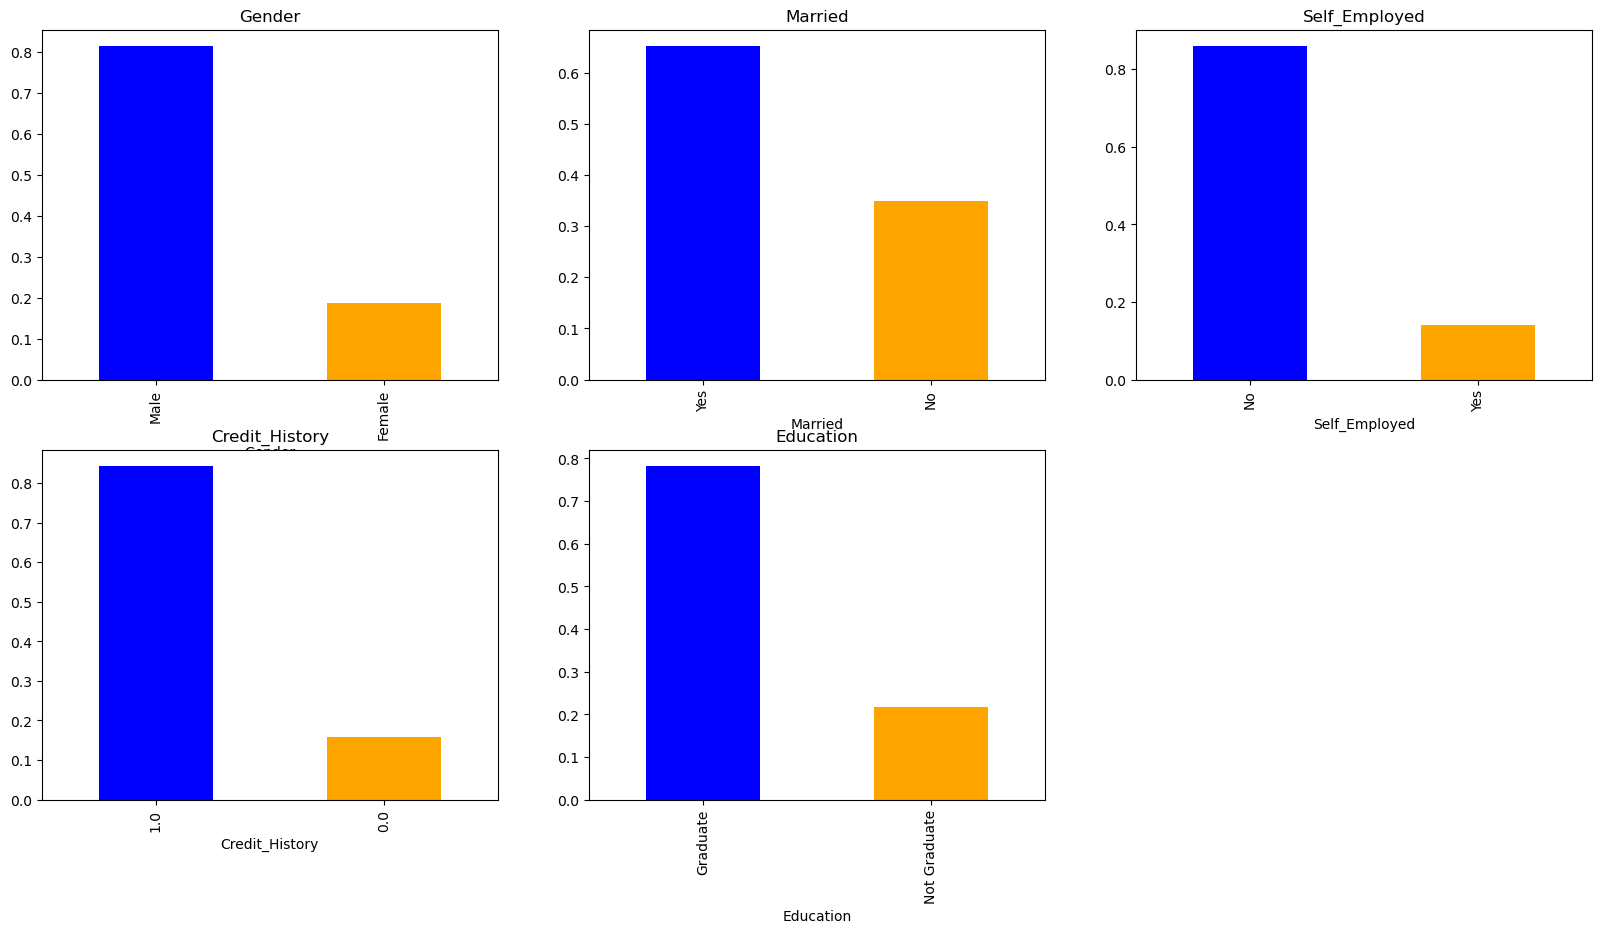

In [29]:
# Visualizing categorical features with custom colors
plt.subplot(231)
train['Gender'].value_counts(normalize=True).plot.bar(figsize=(20,10), title='Gender', color=['blue', 'orange'])

plt.subplot(232)
train['Married'].value_counts(normalize=True).plot.bar(title='Married', color=['blue', 'orange'])

plt.subplot(233)
train['Self_Employed'].value_counts(normalize=True).plot.bar(title='Self_Employed', color=['blue', 'orange'])

plt.subplot(234)
train['Credit_History'].value_counts(normalize=True).plot.bar(title='Credit_History', color=['blue', 'orange'])

plt.subplot(235)
train['Education'].value_counts(normalize=True).plot.bar(title='Education', color=['blue', 'orange'])

plt.show()


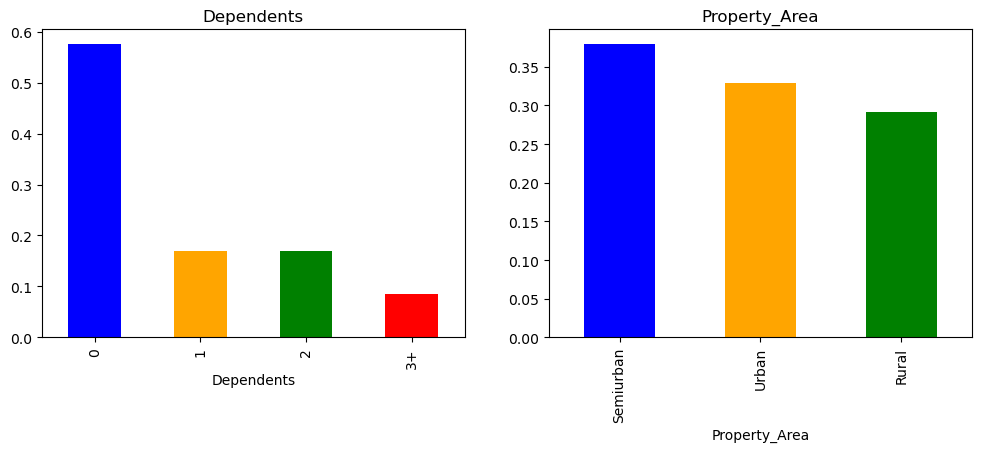

In [31]:
# Visualizing remaining categorical features with specific colors
plt.subplot(121)
train['Dependents'].value_counts(normalize=True).plot.bar(figsize=(12,4), title='Dependents', color=['blue', 'orange', 'green','red'])

plt.subplot(122)
train['Property_Area'].value_counts(normalize=True).plot.bar(title='Property_Area', color=['blue', 'orange', 'green'])

plt.show()


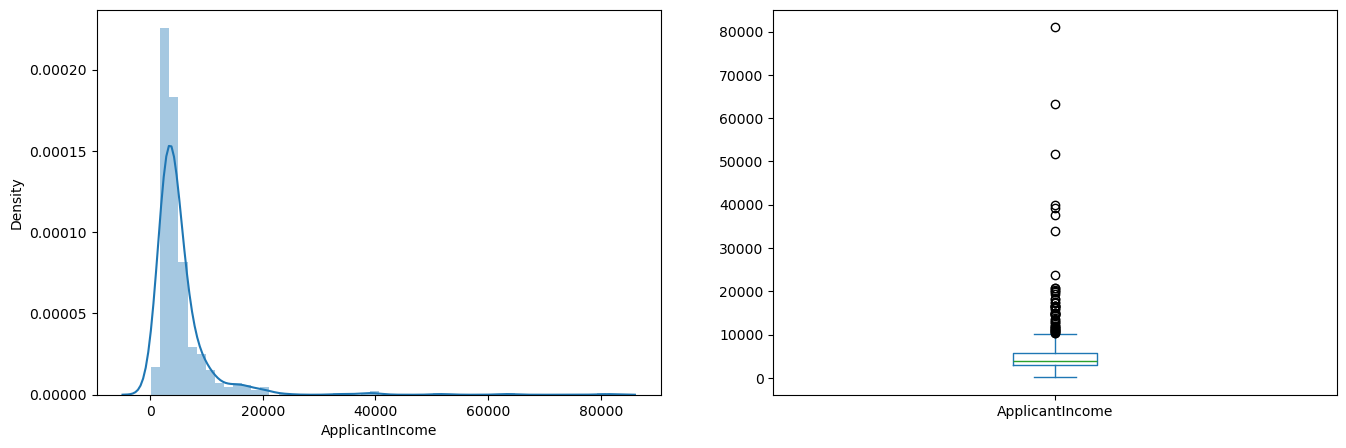

In [33]:
# Visualizing ApplicantIncome
# plt.figure(1)
plt.subplot(121)
sns.distplot(train['ApplicantIncome']);

plt.subplot(122)
train['ApplicantIncome'].plot.box(figsize=(16,5))

plt.show()

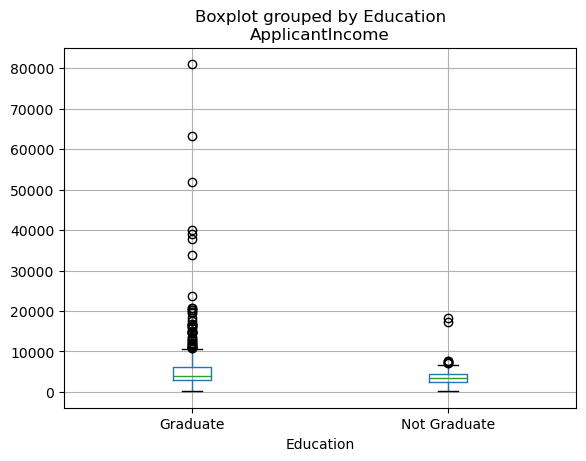

In [35]:
train.boxplot(column='ApplicantIncome', by = 'Education')
#plt.suptitle("")
plt.show()

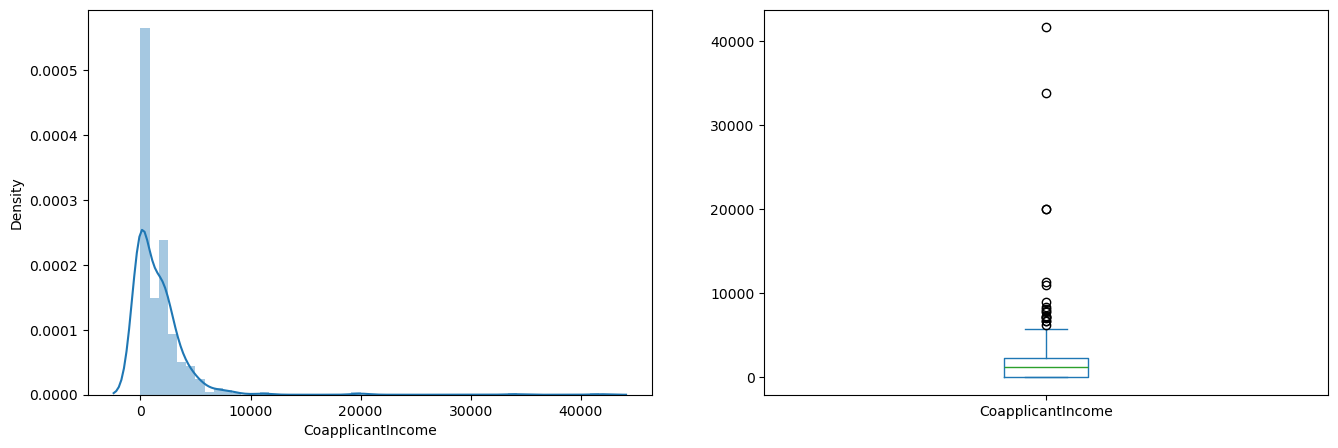

In [37]:
# plt.figure(1)
plt.subplot(121)
sns.distplot(train['CoapplicantIncome']);

plt.subplot(122)
train['CoapplicantIncome'].plot.box(figsize=(16,5))

plt.show()

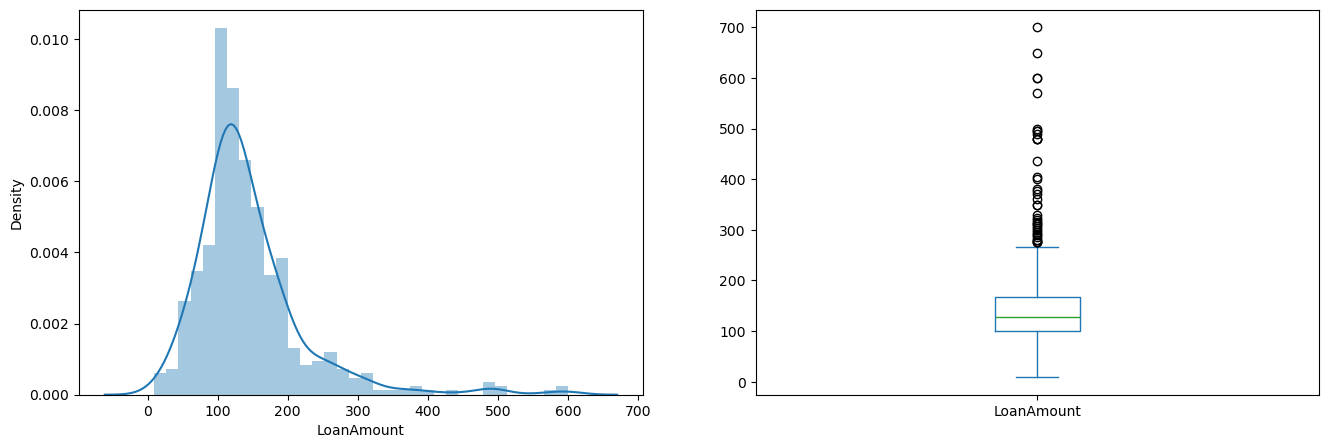

In [39]:
# plt.figure(1)
plt.subplot(121)
df=train.dropna()
sns.distplot(df['LoanAmount']);

plt.subplot(122)
train['LoanAmount'].plot.box(figsize=(16,5))

plt.show()

In [41]:
# frequency table of a variable will give us the count of each category in that variable
train['Loan_Amount_Term'].value_counts()

Loan_Amount_Term
360.0    512
180.0     44
480.0     15
300.0     13
240.0      4
84.0       4
120.0      3
60.0       2
36.0       2
12.0       1
Name: count, dtype: int64

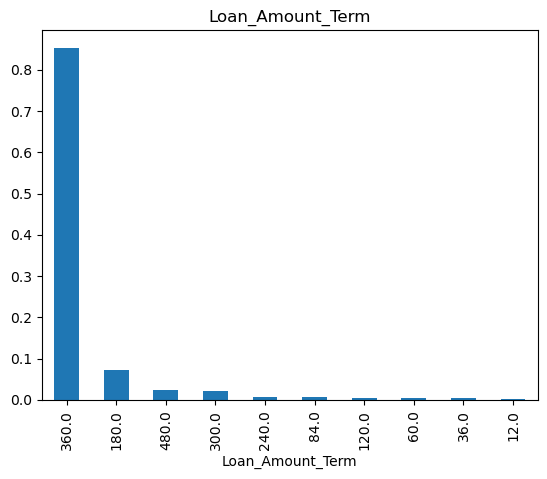

In [43]:
# plot bar chart
train['Loan_Amount_Term'].value_counts(normalize=True).plot.bar(title= 'Loan_Amount_Term')
plt.show()

Loan_Status    N    Y
Gender               
Female        37   75
Male         150  339


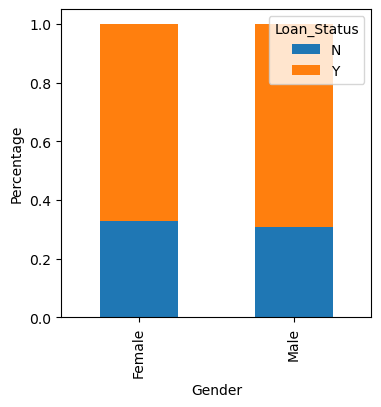

In [45]:
print(pd.crosstab(train['Gender'],train['Loan_Status']))

Gender = pd.crosstab(train['Gender'],train['Loan_Status'])
Gender.div(Gender.sum(1).astype(float), axis = 0).plot(kind="bar", stacked=True, figsize=(4,4))
plt.xlabel('Gender')
p = plt.ylabel('Percentage')
plt.show()

Loan_Status    N    Y
Married              
No            79  134
Yes          113  285


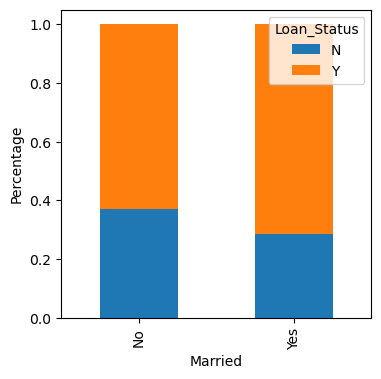

In [47]:
print(pd.crosstab(train['Married'],train['Loan_Status']))

Married = pd.crosstab(train['Married'],train['Loan_Status'])
Married.div(Married.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(4,4))
plt.xlabel('Married')
plt.ylabel('Percentage')
plt.show()

Loan_Status    N    Y
Dependents           
0            107  238
1             36   66
2             25   76
3+            18   33


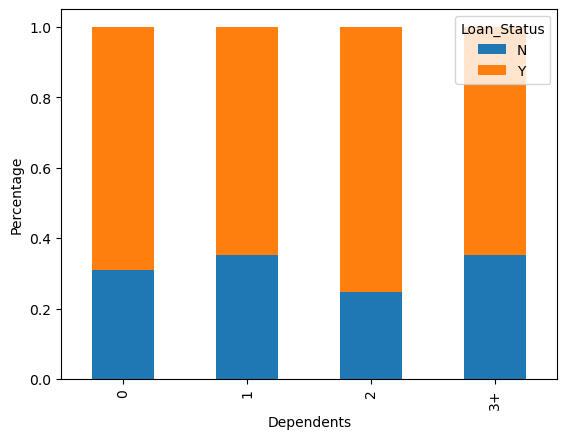

In [49]:
print(pd.crosstab(train['Dependents'],train['Loan_Status']))

Dependents=pd.crosstab(train['Dependents'],train['Loan_Status'])
Dependents.div(Dependents.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True)
plt.xlabel('Dependents')
plt.ylabel('Percentage')
plt.show()

Loan_Status     N    Y
Education             
Graduate      140  340
Not Graduate   52   82


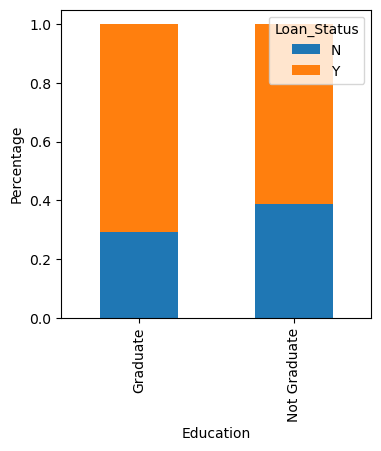

In [51]:
print(pd.crosstab(train['Education'],train['Loan_Status']))

Education=pd.crosstab(train['Education'],train['Loan_Status'])
Education.div(Education.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(4,4))
plt.xlabel('Education')
plt.ylabel('Percentage')
plt.show()

Loan_Status      N    Y
Self_Employed          
No             157  343
Yes             26   56


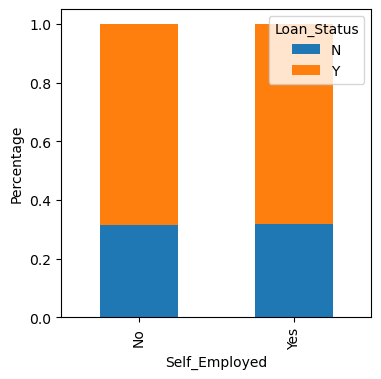

In [53]:
print(pd.crosstab(train['Self_Employed'],train['Loan_Status']))

Self_Employed=pd.crosstab(train['Self_Employed'],train['Loan_Status'])
Self_Employed.div(Self_Employed.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(4,4))
plt.xlabel('Self_Employed')
plt.ylabel('Percentage')
plt.show()

Loan_Status      N    Y
Credit_History         
0.0             82    7
1.0             97  378


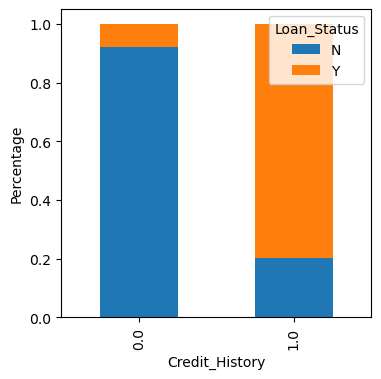

In [55]:
print(pd.crosstab(train['Credit_History'],train['Loan_Status']))

Credit_History=pd.crosstab(train['Credit_History'],train['Loan_Status'])
Credit_History.div(Credit_History.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(4,4))
plt.xlabel('Credit_History')
p = plt.ylabel('Percentage')
plt.show()

Loan_Status     N    Y
Property_Area         
Rural          69  110
Semiurban      54  179
Urban          69  133


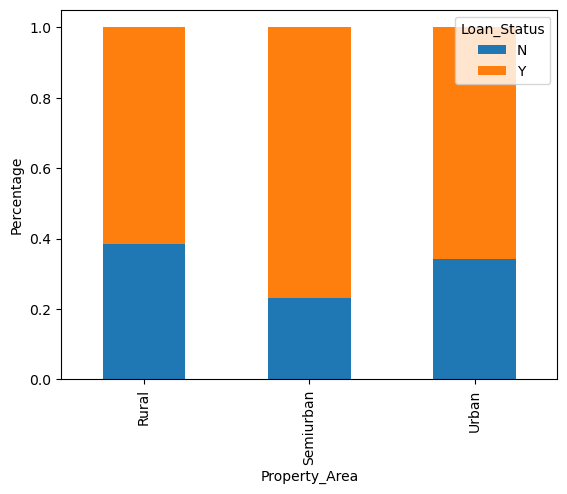

In [57]:
print(pd.crosstab(train['Property_Area'],train['Loan_Status']))

Property_Area=pd.crosstab(train['Property_Area'],train['Loan_Status'])
Property_Area.div(Property_Area.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True)
plt.xlabel('Property_Area')
P = plt.ylabel('Percentage')
plt.show()

Loan_Status
N    5446.078125
Y    5384.068720
Name: ApplicantIncome, dtype: float64


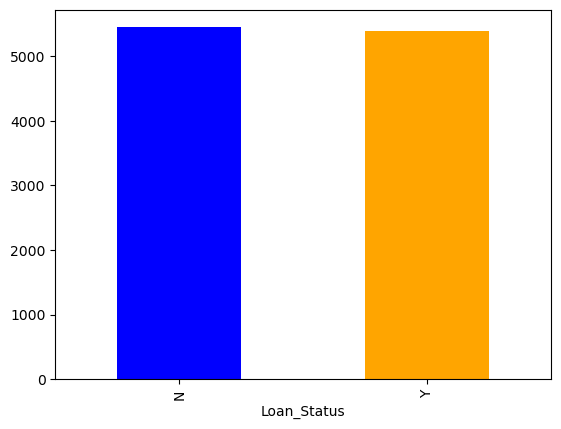

In [59]:
# Print the mean ApplicantIncome grouped by Loan_Status
print(train.groupby('Loan_Status')['ApplicantIncome'].mean())

# Bar plot with customized colors (blue and green)
train.groupby('Loan_Status')['ApplicantIncome'].mean().plot.bar(color=['blue', 'orange'])
plt.show()


In [61]:
# making bins for applicant income variable
bins = [0,2500,4000,6000,81000]
group = ['Low','Average','High', 'Very high']
train['Income_bin'] = pd.cut(df['ApplicantIncome'],bins,labels=group)

In [63]:
# take a look at the train set
train.head(8)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Income_bin
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y,NaN
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N,High
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y,Average
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y,Average
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y,High
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y,High
6,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y,Low
7,LP001014,Male,Yes,3+,Graduate,No,3036,2504.0,158.0,360.0,0.0,Semiurban,N,Average


Loan_Status   N    Y
Income_bin          
Low          26   57
Average      51  123
High         32   79
Very high    39   73


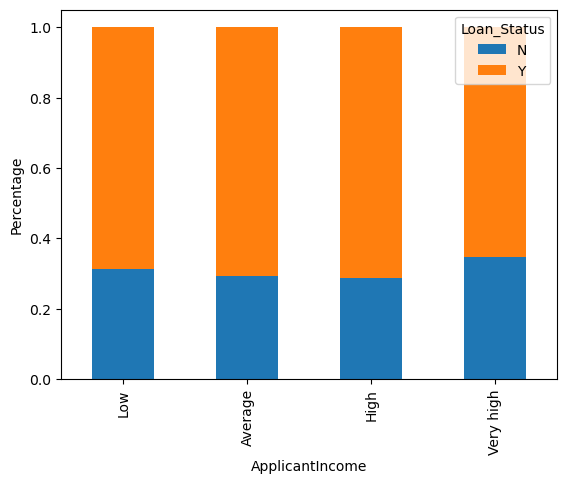

In [65]:
print(pd.crosstab(train['Income_bin'],train['Loan_Status']))

Income_bin = pd.crosstab(train['Income_bin'],train['Loan_Status'])
Income_bin.div(Income_bin.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True)
plt.xlabel('ApplicantIncome')
P = plt.ylabel('Percentage')
plt.show()

In [67]:
# making bins for Coapplicant income variable
bins = [0,1000,3000,42000]
group = ['Low','Average','High']
train['Coapplicant_Income_bin'] = pd.cut(df['CoapplicantIncome'],bins,labels=group)

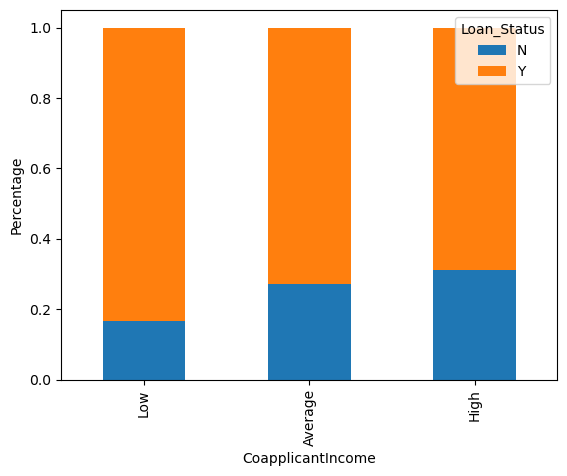

In [69]:
# plot the chart
Coapplicant_Income_bin = pd.crosstab(train['Coapplicant_Income_bin'],train['Loan_Status'])
Coapplicant_Income_bin.div(Coapplicant_Income_bin.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True)
plt.xlabel('CoapplicantIncome')
P = plt.ylabel('Percentage')
plt.show()

In [71]:
print(len(train[train["CoapplicantIncome"] == 0]))
"Percentage of CoapplicantIncome = 0 is:",  len(train[train["CoapplicantIncome"] == 0])/len(train["CoapplicantIncome"])


273


('Percentage of CoapplicantIncome = 0 is:', 0.44462540716612375)

In [73]:
# create a new variable
train['Total_Income'] = train['ApplicantIncome'] + train['CoapplicantIncome']

In [75]:
# making bins for Total Income variable
bins = [0,2500,4000,6000,81000]
group = ['Low','Average','High', 'Very high']
train['Total_Income_bin'] = pd.cut(train['Total_Income'],bins,labels=group)

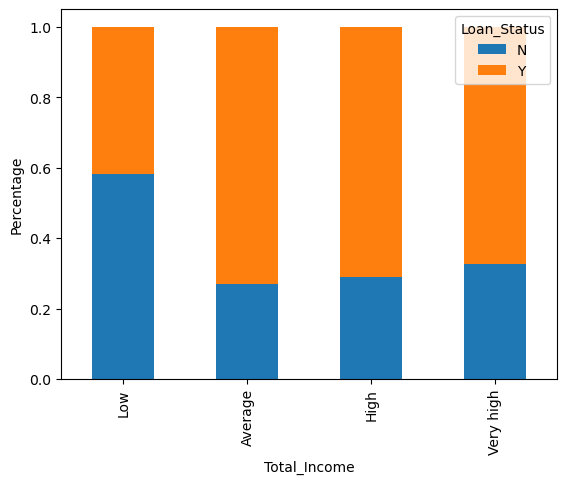

In [77]:
# plot the chart
Total_Income_bin = pd.crosstab(train['Total_Income_bin'],train['Loan_Status'])
Total_Income_bin.div(Total_Income_bin.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True)
plt.xlabel('Total_Income')
P = plt.ylabel('Percentage')
plt.show()

In [79]:
# making bins for LoanAmount variable
bins = [0,100,200,700]
group = ['Low','Average','High']
train['LoanAmount_bin'] = pd.cut(df['LoanAmount'],bins,labels=group)

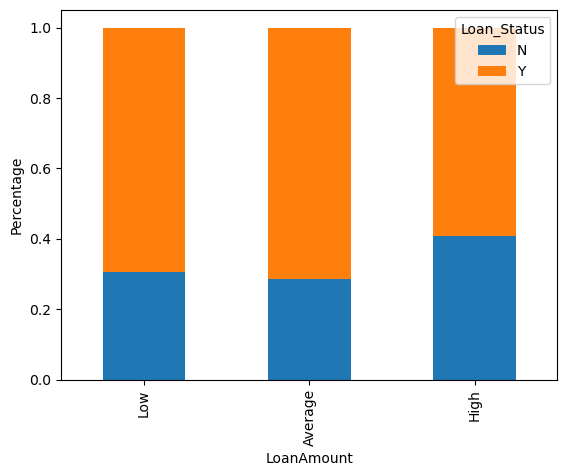

In [81]:
# plot the chart 
LoanAmount_bin = pd.crosstab(train['LoanAmount_bin'],train['Loan_Status'])
LoanAmount_bin.div(LoanAmount_bin.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True)
plt.xlabel('LoanAmount')
P = plt.ylabel('Percentage')
plt.show()

In [83]:
# before dropping
train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Income_bin,Coapplicant_Income_bin,Total_Income,Total_Income_bin,LoanAmount_bin
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y,NaN,NaN,5849.0,High,NaN
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N,High,Average,6091.0,Very high,Average
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y,Average,NaN,3000.0,Average,Low
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y,Average,Average,4941.0,High,Average
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y,High,NaN,6000.0,High,Average


In [85]:
# drop the new variable of bins
train = train.drop(['Income_bin', 'Coapplicant_Income_bin', 'LoanAmount_bin', 'Total_Income_bin', 'Total_Income'], axis=1)


In [87]:
# after dropping
train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [89]:
# replacing 3+ in Dependents variable with 3 for both train and test set
train['Dependents'].replace('3+', 3, inplace=True)
test['Dependents'].replace('3+', 3, inplace=True)


In [91]:
# replacing Y and N in Loan_Status variable with 1 and 0 respectively
train['Loan_Status'].replace('N', 0, inplace=True)
train['Loan_Status'].replace('Y', 1, inplace=True)

In [93]:
# check the dataset
train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,1
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,0
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,1
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,1
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,1


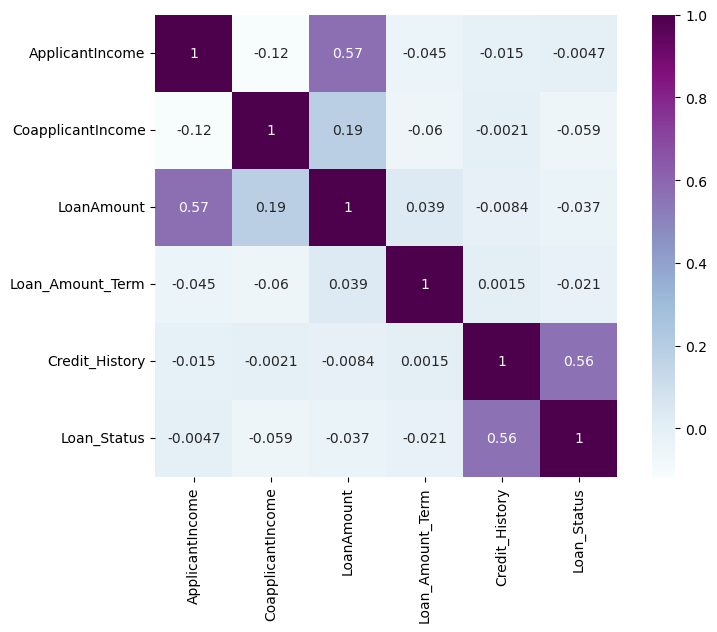

In [95]:
# Calculate and visualize the correlation matrix for numeric columns
numeric_data = train.select_dtypes(include=['number'])  # Select only numeric columns
matrix = numeric_data.corr()  # Compute the correlation matrix

# Plot the heatmap
f, ax = plt.subplots(figsize=(9, 6))
sns.heatmap(matrix, vmax=1, square=True, cmap="BuPu", annot=True)
plt.show()


In [97]:
# check for missing values
train.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [99]:
# replace missing values with the mode
train['Gender'].fillna(train['Gender'].mode()[0], inplace=True)
train['Married'].fillna(train['Married'].mode()[0], inplace=True)
train['Dependents'].fillna(train['Dependents'].mode()[0], inplace=True)
train['Self_Employed'].fillna(train['Self_Employed'].mode()[0], inplace=True)
train['Credit_History'].fillna(train['Credit_History'].mode()[0], inplace=True)

In [101]:
train['Loan_Amount_Term'].value_counts()

Loan_Amount_Term
360.0    512
180.0     44
480.0     15
300.0     13
240.0      4
84.0       4
120.0      3
60.0       2
36.0       2
12.0       1
Name: count, dtype: int64

In [103]:
# replace missing value with the mode
train['Loan_Amount_Term'].fillna(train['Loan_Amount_Term'].mode()[0], inplace=True)

In [105]:
# replace missing values with the median value due to outliers
train['LoanAmount'].fillna(train['LoanAmount'].median(), inplace=True)


In [107]:
# check whether all the missing values are filled in the Train dataset
train.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [109]:
# replace missing values in Test set with mode/median from Training set
test['Gender'].fillna(train['Gender'].mode()[0], inplace=True)
test['Dependents'].fillna(train['Dependents'].mode()[0], inplace=True)
test['Self_Employed'].fillna(train['Self_Employed'].mode()[0], inplace=True)
test['Credit_History'].fillna(train['Credit_History'].mode()[0], inplace=True)
test['Loan_Amount_Term'].fillna(train['Loan_Amount_Term'].mode()[0], inplace=True)
test['LoanAmount'].fillna(train['LoanAmount'].median(), inplace=True)

In [111]:
# check whether all the missing values are filled in the Test dataset
test.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
dtype: int64

In [113]:
# before log transformation

ax1 = plt.subplot(121)
train['LoanAmount'].hist(bins=20, figsize=(12,4))
ax1.set_title("Train")

ax2 = plt.subplot(122)
test['LoanAmount'].hist(bins=20)
ax2.set_title("Test")

Text(0.5, 1.0, 'Test')

In [115]:
# Removing skewness in LoanAmount variable by log transformation
train['LoanAmount_log'] = np.log(train['LoanAmount'])
test['LoanAmount_log'] = np.log(test['LoanAmount'])

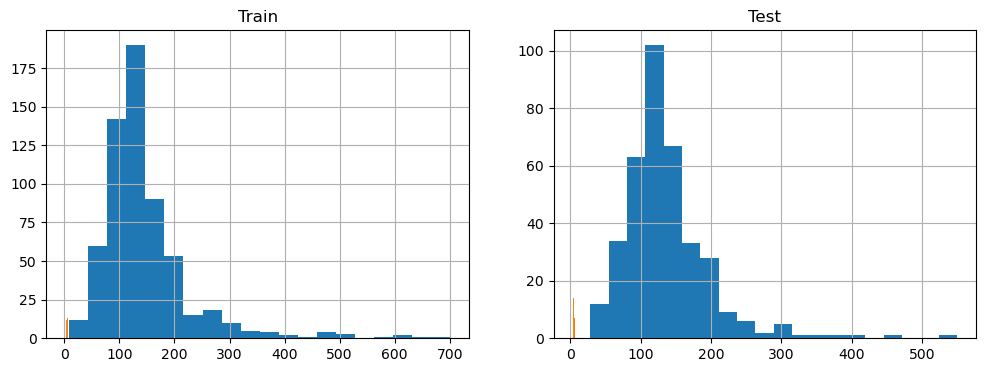

In [117]:
# after log transformation

ax1 = plt.subplot(121)
train['LoanAmount_log'].hist(bins=20, figsize=(12,4))
ax1.set_title("Train")

ax2 = plt.subplot(122)
test['LoanAmount_log'].hist(bins=20)
ax2.set_title("Test")
plt.show()

In [119]:
# drop Loan_ID 
train = train.drop('Loan_ID', axis=1)
test = test.drop('Loan_ID', axis=1)

In [121]:
# Drop "Loan_Status" and assign it to feature variable X, and target variable y
X = train.drop('Loan_Status', axis=1)
y = train['Loan_Status']


In [123]:
# adding dummies to the dataset
X = pd.get_dummies(X)
train = pd.get_dummies(train)
test = pd.get_dummies(test)

In [125]:
X.shape, train.shape, test.shape

((614, 21), (614, 22), (367, 21))

In [127]:
X.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,LoanAmount_log,Gender_Female,Gender_Male,Married_No,Married_Yes,...,Dependents_0,Dependents_1,Dependents_2,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
0,5849,0.0,128.0,360.0,1.0,4.852030,False,True,True,False,...,True,False,False,True,False,True,False,False,False,True
1,4583,1508.0,128.0,360.0,1.0,4.852030,False,True,False,True,...,False,True,False,True,False,True,False,True,False,False
2,3000,0.0,66.0,360.0,1.0,4.189655,False,True,False,True,...,True,False,False,True,False,False,True,False,False,True
3,2583,2358.0,120.0,360.0,1.0,4.787492,False,True,False,True,...,True,False,False,False,True,True,False,False,False,True
4,6000,0.0,141.0,360.0,1.0,4.948760,False,True,True,False,...,True,False,False,True,False,True,False,False,False,True


In [129]:

# import library
from sklearn.model_selection import train_test_split


In [131]:
# split the data into train and cross validation set
x_train, x_cv, y_train, y_cv = train_test_split(X, y, test_size=0.3, random_state=0)


In [133]:
# take a look at the dimension of the data
x_train.shape, x_cv.shape, y_train.shape, y_cv.shape

((429, 21), (185, 21), (429,), (185,))

In [135]:
# import libraries
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [137]:
# fit the model
model = LogisticRegression()
model.fit(x_train, y_train)

LogisticRegression()

In [139]:
# make prediction
pred_cv = model.predict(x_cv)

In [141]:
# calculate accuracy score
accuracy_score(y_cv, pred_cv)

0.827027027027027

[[ 23  28]
 [  4 130]]


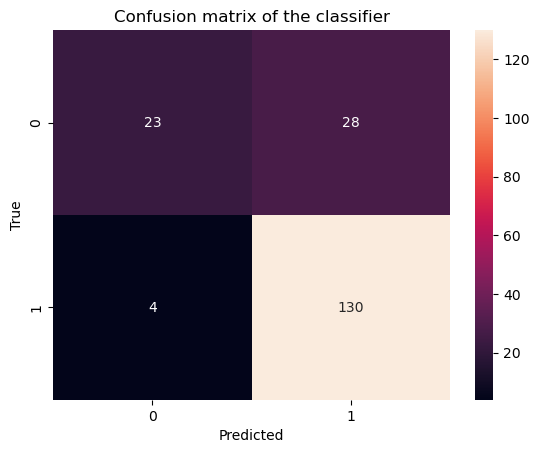

In [143]:

# import confusion_matrix
from sklearn.metrics import confusion_matrix
 
cm = confusion_matrix(y_cv, pred_cv)
print(cm)

# f, ax = plt.subplots(figsize=(9, 6))
sns.heatmap(cm, annot=True, fmt="d")
plt.title('Confusion matrix of the classifier')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [145]:
# import classification_report
from sklearn.metrics import classification_report
print(classification_report(y_cv, pred_cv))

              precision    recall  f1-score   support

           0       0.85      0.45      0.59        51
           1       0.82      0.97      0.89       134

    accuracy                           0.83       185
   macro avg       0.84      0.71      0.74       185
weighted avg       0.83      0.83      0.81       185



In [147]:
# make prediction on test set
pred_test = model.predict(test)

In [149]:
import pandas as pd

# Assuming you have the following:
# 'pred_test' contains your predicted loan statuses (0 or 1)
# 'test_original' contains your test dataset and its 'Loan_ID' column

# Create the submission DataFrame
submission = pd.DataFrame()

# Fill in the predicted loan status
submission['Loan_Status'] = pred_test

# Fill in the Loan_ID from your original test data
submission['Loan_ID'] = test_original['Loan_ID']

# Replace 0 and 1 with 'N' and 'Y'
submission['Loan_Status'].replace(0, 'N', inplace=True)
submission['Loan_Status'].replace(1, 'Y', inplace=True)

# Convert the DataFrame to CSV format and save it
submission.to_csv('XGBoost_submission.csv', index=False)

print("Sample submission file 'XGBoost_submission.csv' created successfully!")


Sample submission file 'XGBoost_submission.csv' created successfully!


In [151]:
from IPython.display import FileLink

# Create a download link for the file
FileLink('XGBoost_submission.csv')


/Users/navithanelluri/XGBoost_submission.csv

In [153]:
# fill the Loan_ID and Loan_Status
submission['Loan_Status'] = pred_test
submission['Loan_ID'] = test_original['Loan_ID']

In [155]:
# replace with "N" and "Y"
submission['Loan_Status'].replace(0, 'N', inplace=True)
submission['Loan_Status'].replace(1, 'Y', inplace=True)

In [157]:
# take a look at the submission result
submission.head()

,Loan_Status,Loan_ID
0,Y,LP001015
1,Y,LP001022
2,Y,LP001031
3,Y,LP001035
4,Y,LP001051


In [159]:
# convert to CSV file, without row index
submission.to_csv('logistic.csv', index=False)

In [161]:
# import StratifiedKFold from sklearn and fit the model
from sklearn.model_selection import StratifiedKFold

In [163]:
# stratified 5 folds, shuffle each stratification of the data before splitting into batches

mean_accuracy = []
i = 1
kf = StratifiedKFold(n_splits=5, random_state=1, shuffle=True)

for train_index, test_index in kf.split(X, y):
    print('\n{} of kfold {}'.format(i, kf.n_splits))
    xtr, xvl = X.loc[train_index], X.loc[test_index]
    ytr, yvl = y[train_index], y[test_index]
    
    model = LogisticRegression(random_state=1)
    model.fit(xtr, ytr)
    pred_test = model.predict(xvl)
    score = accuracy_score(yvl, pred_test)
    mean_accuracy.append(score)
    print('accuracy_score', score)
    i+=1
    
print("\nMean validation accuracy: ", sum(mean_accuracy)/len(mean_accuracy))


# make prediction on test set
pred_test = model.predict(test)


# calculate probability estimates of loan approval
# column 0 is the probability for class 0 and column 1 is the probability for class 1
# probability of loan default = 1 - model.predict_proba(test)[:,1]
pred = model.predict_proba(xvl)[:,1]


1 of kfold 5
accuracy_score 0.8048780487804879

2 of kfold 5
accuracy_score 0.8373983739837398

3 of kfold 5
accuracy_score 0.7804878048780488

4 of kfold 5
accuracy_score 0.7886178861788617

5 of kfold 5
accuracy_score 0.7950819672131147

Mean validation accuracy:  0.8012928162068507


In [165]:
"""
i = 1
kf = StratifiedKFold(n_splits=5, random_state=1, shuffle=True)

for train_index, test_index in kf.split(X, y):
    print('\n{} of kfold {}'.format(i, kf.n_splits))
    X_train, X_test = X.loc[train_index], X.loc[test_index]
    y_train, y_test = y[train_index], y[test_index]
  
    model = LogisticRegression(random_state=1)
    model.fit(X_train, y_train)
    pred_test = model.predict(X_test)
    score = accuracy_score(y_test, pred_test)
    print('accuracy_score', score)
    i+=1
"""

"\ni = 1\nkf = StratifiedKFold(n_splits=5, random_state=1, shuffle=True)\n\nfor train_index, test_index in kf.split(X, y):\n    print('\n{} of kfold {}'.format(i, kf.n_splits))\n    X_train, X_test = X.loc[train_index], X.loc[test_index]\n    y_train, y_test = y[train_index], y[test_index]\n  \n    model = LogisticRegression(random_state=1)\n    model.fit(X_train, y_train)\n    pred_test = model.predict(X_test)\n    score = accuracy_score(y_test, pred_test)\n    print('accuracy_score', score)\n    i+=1\n"

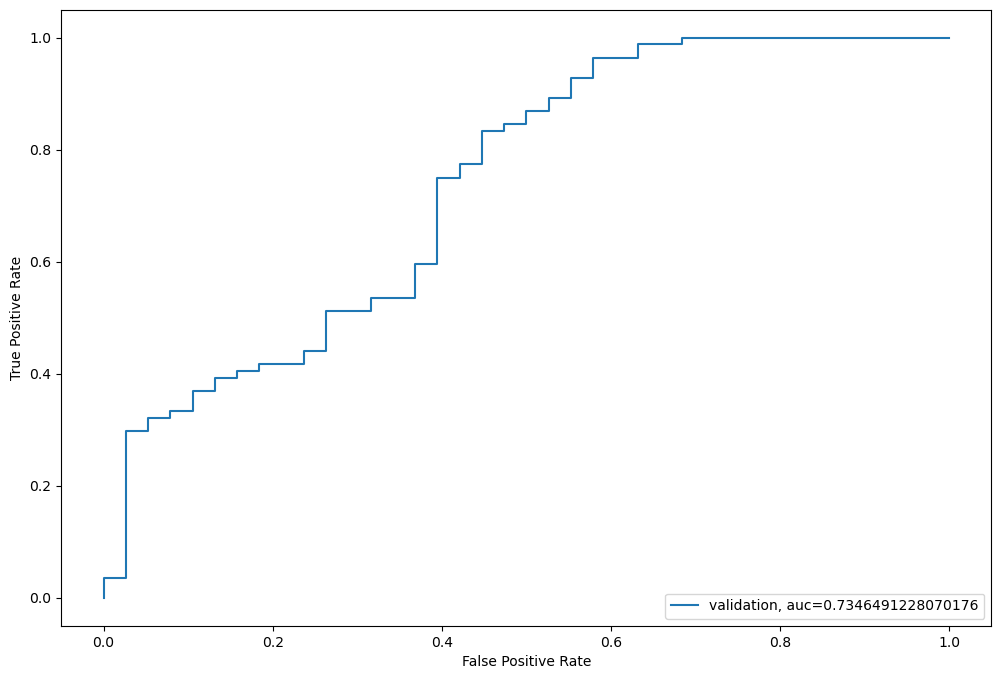

In [167]:
# visualize ROC curve
from sklearn import metrics
fpr, tpr, _ = metrics.roc_curve(yvl,  pred)
auc = metrics.roc_auc_score(yvl, pred)
plt.figure(figsize=(12,8))
plt.plot(fpr,tpr,label="validation, auc="+str(auc))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc=4)
plt.show()

In [169]:
submission['Loan_Status'] = pred_test
submission['Loan_ID'] = test_original['Loan_ID']

In [171]:
submission['Loan_Status'].replace(0, 'N', inplace=True)
submission['Loan_Status'].replace(1, 'Y', inplace=True)

In [173]:
# convert to CSV file, without row index
submission.to_csv('logistic.csv', index=False)

In [175]:
# combine Applicant Income and Coapplicant Income into a new variable
train['Total_Income'] = train['ApplicantIncome'] + train['CoapplicantIncome']
test['Total_Income'] = test['ApplicantIncome'] + test['CoapplicantIncome']

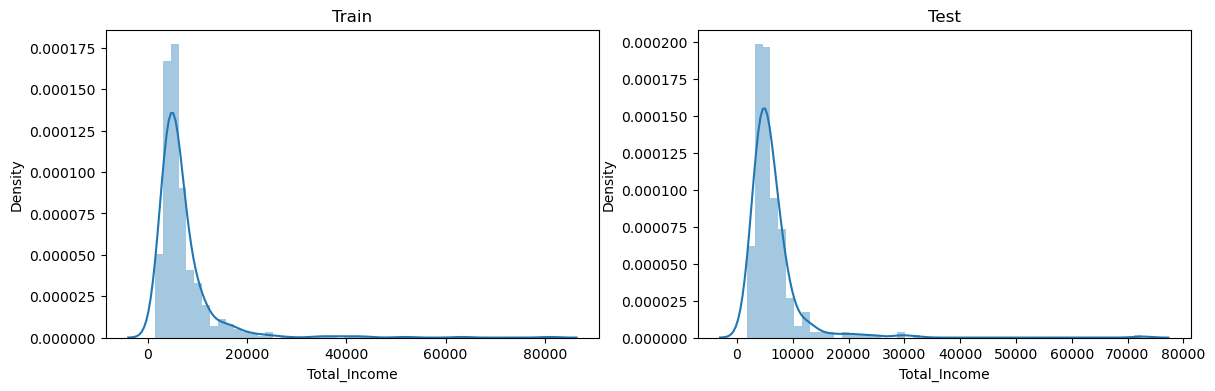

In [177]:
# check the distribution of Total Income
# before log transformation

fig = plt.figure(figsize=(14, 4))
ax1 = plt.subplot(121)
sns.distplot(train['Total_Income'])
 
ax1.set_title("Train")

ax1 = plt.subplot(122)
sns.distplot(test['Total_Income'])
ax1.set_title("Test")
plt.show()

In [179]:
# log transformation
train['Total_Income_log'] = np.log(train['Total_Income'])
test['Total_Income_log'] = np.log(test['Total_Income'])

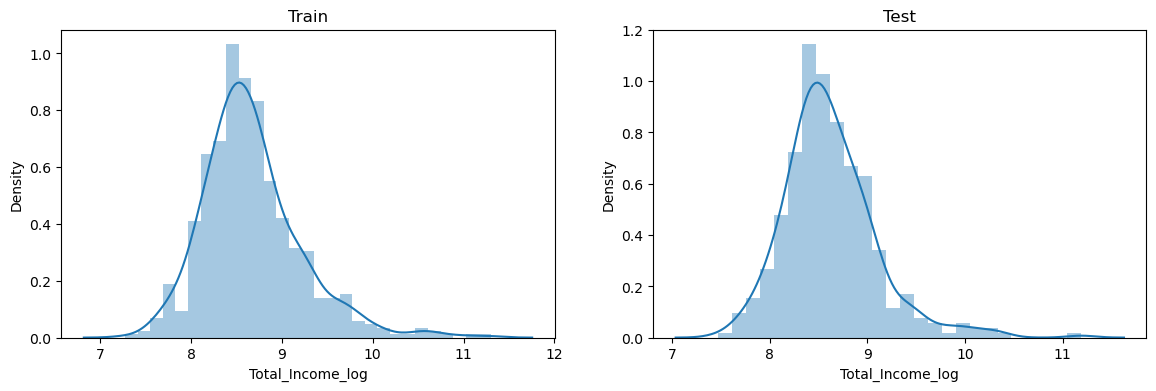

In [181]:
# after log transformation
fig = plt.figure(figsize=(14, 4))
ax1 = plt.subplot(121)
sns.distplot(train['Total_Income_log'])
ax1.set_title("Train")

ax1 = plt.subplot(122)
sns.distplot(test['Total_Income_log'])
ax1.set_title("Test")
plt.show()

In [183]:
# create EMI feature
train['EMI'] = train['LoanAmount'] / train['Loan_Amount_Term']
test['EMI'] = test['LoanAmount'] / test['Loan_Amount_Term']

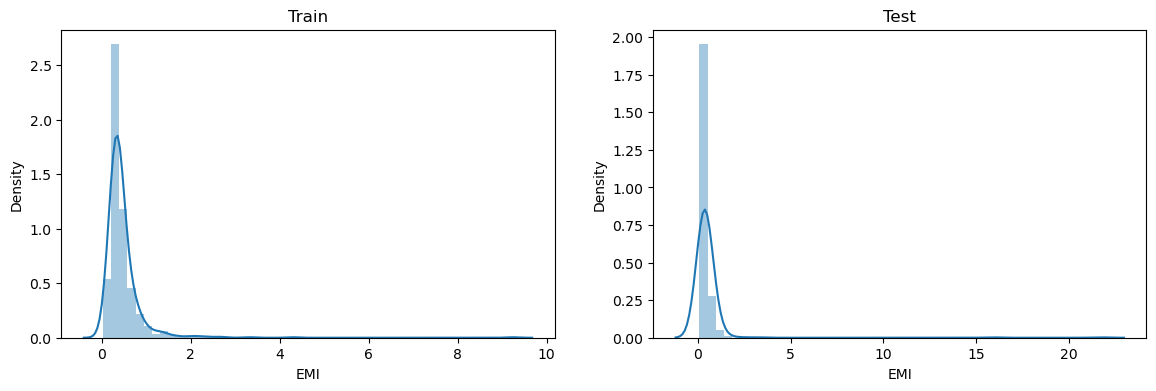

In [185]:
# check the distribution of EMI

fig = plt.figure(figsize=(14, 4))
ax1 = plt.subplot(121)
sns.distplot(train['EMI'])
ax1.set_title("Train")

ax1 = plt.subplot(122)
sns.distplot(test['EMI'])
ax1.set_title("Test")
plt.show()

In [187]:
# create new "Balance Income" variable
train['Balance Income'] = train['Total_Income'] - (train['EMI']*1000) # Multiply with 1000 to make the units equal 
test['Balance Income'] = test['Total_Income'] - (test['EMI']*1000)

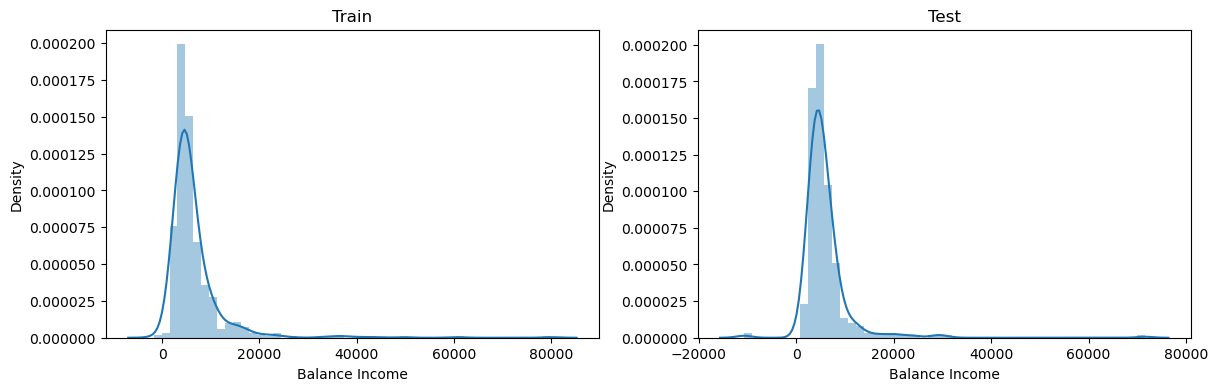

In [189]:
# check the distribution of EMI
# before log transformation

fig = plt.figure(figsize=(14, 4))
ax1 = plt.subplot(121)
sns.distplot(train['Balance Income'])
ax1.set_title("Train")

ax1 = plt.subplot(122)
sns.distplot(test['Balance Income'])
ax1.set_title("Test")
plt.show()

In [191]:
# before dropping variables
train.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,LoanAmount_log,Gender_Female,Gender_Male,Married_No,...,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban,Total_Income,Total_Income_log,EMI,Balance Income
0,5849,0.0,128.0,360.0,1.0,1,4.852030,False,True,True,...,False,True,False,False,False,True,5849.0,8.674026,0.355556,5493.444444
1,4583,1508.0,128.0,360.0,1.0,0,4.852030,False,True,False,...,False,True,False,True,False,False,6091.0,8.714568,0.355556,5735.444444
2,3000,0.0,66.0,360.0,1.0,1,4.189655,False,True,False,...,False,False,True,False,False,True,3000.0,8.006368,0.183333,2816.666667
3,2583,2358.0,120.0,360.0,1.0,1,4.787492,False,True,False,...,True,True,False,False,False,True,4941.0,8.505323,0.333333,4607.666667
4,6000,0.0,141.0,360.0,1.0,1,4.948760,False,True,True,...,False,True,False,False,False,True,6000.0,8.699515,0.391667,5608.333333


In [193]:

# drop the variables
train = train.drop(['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term'], axis=1)
test = test.drop(['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term'], axis=1)

In [195]:
# after dropping variables
train.head()

,Credit_History,Loan_Status,LoanAmount_log,Gender_Female,Gender_Male,Married_No,Married_Yes,Dependents_3,Dependents_0,Dependents_1,...,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban,Total_Income,Total_Income_log,EMI,Balance Income
0,1.0,1,4.852030,False,True,True,False,False,True,False,...,False,True,False,False,False,True,5849.0,8.674026,0.355556,5493.444444
1,1.0,0,4.852030,False,True,False,True,False,False,True,...,False,True,False,True,False,False,6091.0,8.714568,0.355556,5735.444444
2,1.0,1,4.189655,False,True,False,True,False,True,False,...,False,False,True,False,False,True,3000.0,8.006368,0.183333,2816.666667
3,1.0,1,4.787492,False,True,False,True,False,True,False,...,True,True,False,False,False,True,4941.0,8.505323,0.333333,4607.666667
4,1.0,1,4.948760,False,True,True,False,False,True,False,...,False,True,False,False,False,True,6000.0,8.699515,0.391667,5608.333333


In [197]:

# drop "Loan_Status" and assign it to target variable
X = train.drop('Loan_Status', axis=1)
y = train.Loan_Status                # Save target variable in separate dataset

In [199]:
# stratified 5 folds, shuffle each stratification of the data before splitting into batches

mean_accuracy = []
i = 1
kf = StratifiedKFold(n_splits=5, random_state=1, shuffle=True)

for train_index, test_index in kf.split(X, y):
    print('\n{} of kfold {}'.format(i, kf.n_splits))
    xtr, xvl = X.loc[train_index], X.loc[test_index]
    ytr, yvl = y[train_index], y[test_index]
    
    model = LogisticRegression(random_state=1)
    model.fit(xtr, ytr)
    pred_test = model.predict(xvl)
    score = accuracy_score(yvl, pred_test)
    mean_accuracy.append(score)
    print('accuracy_score', score)
    i+=1
    
print("\nMean validation accuracy: ", sum(mean_accuracy)/len(mean_accuracy))


# make prediction on test set
pred_test = model.predict(test)


# calculate probability estimates of loan approval
# column 0 is the probability for class 0 and column 1 is the probability for class 1
# probability of loan default = 1 - model.predict_proba(test)[:,1]
pred = model.predict_proba(xvl)[:,1]


1 of kfold 5
accuracy_score 0.7886178861788617

2 of kfold 5
accuracy_score 0.8373983739837398

3 of kfold 5
accuracy_score 0.7967479674796748

4 of kfold 5
accuracy_score 0.7804878048780488

5 of kfold 5
accuracy_score 0.7868852459016393

Mean validation accuracy:  0.7980274556843929


In [200]:
# filling Loan_Status with predictions
submission['Loan_Status'] = pred_test

# filling Loan_ID with test Loan_ID
submission['Loan_ID'] = test_original['Loan_ID'] 

In [203]:
# replacing 0 and 1 with N and Y
submission['Loan_Status'].replace(0, 'N', inplace=True)
submission['Loan_Status'].replace(1, 'Y', inplace=True)

In [205]:
# Converting submission file to .csv format
submission.to_csv('Log2.csv', index=False)